# Task 1: Deep Learning Fundamentals

In [1]:
import torch
from torch import nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu" # checks if you have a GPU available
print(f"Using {device} device")

Using cuda device


## 1.1 Data Preprocessing

For this task, we will use the CelebA dataset (https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html). In the dataset you have images of celebrities and can predict several different target values. One of them is the attribute "smiling". 

In [2]:
get_smile = lambda attr: (attr[31]==1).float() # target transform to get 'Smiling' attribute
# download training data from open datasets.
training_data = datasets.CelebA(
    root="C:/Users/ZhuanZ/Desktop/RI/ask",
    split="train",      
    target_type="attr", 
    download=True, 
    transform=ToTensor(),
    target_transform=get_smile,
)
training_data = torch.utils.data.Subset(training_data, range(0, 20000))

# download test data from open datasets.
test_data = datasets.CelebA(
    root="C:/Users/ZhuanZ/Desktop/RI/task",
    split="test",    
    target_type="attr", 
    download=True, 
    transform=ToTensor(),
    target_transform=get_smile, 
)

In [3]:
batch_size = 128

# create data loaders
train_dataloader = DataLoader(training_data, batch_size=batch_size ,shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([128, 3, 218, 178])
Shape of y: torch.Size([128]) torch.float32


## 1.2 Model definition

In the following code block, implement a custom neural network using linear layers and activation functions to process the input images and predict the binary output "smiling" or "not smiling".

In [4]:
# define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        input_features = 3 * 218 * 178
        
        # TODO: transform your input image to work with linear layers
        
        self.flatten = nn.Flatten()
        
        # TODO: define your neural network layers and activation functions
        self.layer_1 = nn.Linear(input_features, 512)
        self.layer_2 = nn.Linear(512, 256)
        
        self.output_layer = nn.Linear(256, 1)
        
    def forward(self, x):
        # TODO: implement the forward pass of your neural network
        
        x = self.flatten(x)
        x = nn.functional.relu(self.layer_1(x))
        x = nn.functional.relu(self.layer_2(x))
        logits= self.output_layer(x)
        
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer_1): Linear(in_features=116412, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=256, bias=True)
  (output_layer): Linear(in_features=256, out_features=1, bias=True)
)


## 1.3 Definition of Loss function and Optimizer for the Model Parameters

Choose a fitting loss function and optimizer for your neural network.

In [5]:
# TODO: define loss function
loss_fn = nn.BCEWithLogitsLoss()
# TODO: define optimzer
optimizer = AdamW(model.parameters(), lr=0.001)

## 1.4 Implementation of the training loop

In [6]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device).unsqueeze(1)

        # TODO: predict outcome with model
        pred = model(X)
        # TODO: compute cross-entropy loss between prediction and label
        loss = loss_fn(pred, y)
        # TODO: reset optimizer for next step
        optimizer.zero_grad()
        # TODO: Backpropagation
        loss.backward()
        # TODO: one step with stochastic gradient descent
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

## Implementation of the test loop

In [7]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device).unsqueeze(1)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            pred = (pred >= 0.5).float()
            correct += (pred == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

## Define how often to loop over the complete dataset

In [8]:
epochs = 15
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.690591  [  128/20000]
loss: 0.583337  [12928/20000]
Test Error: 
 Accuracy: 82.6%, Avg loss: 0.404647 

Epoch 2
-------------------------------
loss: 0.368660  [  128/20000]
loss: 0.348128  [12928/20000]
Test Error: 
 Accuracy: 82.9%, Avg loss: 0.345807 

Epoch 3
-------------------------------
loss: 0.229715  [  128/20000]
loss: 0.346409  [12928/20000]
Test Error: 
 Accuracy: 81.8%, Avg loss: 0.448349 

Epoch 4
-------------------------------
loss: 0.536639  [  128/20000]
loss: 0.327369  [12928/20000]
Test Error: 
 Accuracy: 86.6%, Avg loss: 0.293589 

Epoch 5
-------------------------------
loss: 0.233269  [  128/20000]
loss: 0.307967  [12928/20000]
Test Error: 
 Accuracy: 87.5%, Avg loss: 0.293997 

Epoch 6
-------------------------------
loss: 0.227629  [  128/20000]
loss: 0.269225  [12928/20000]
Test Error: 
 Accuracy: 87.8%, Avg loss: 0.275746 

Epoch 7
-------------------------------
loss: 0.281871  [  128/20000]
loss: 0.192556  [1

## Visualizing the results

If your model training ran successfully, you can evaluate it on the unseen Test data.

In [9]:
model.eval()
x, y = next(iter(test_dataloader))
x, y = x.to(device), y.to(device)
with torch.no_grad():
    pred = model(x)
    predicted = (pred >= 0.5).float()
    for i in range(10):
        print(f'Predicted: "{predicted[i].item()}", Actual: "{y[i].item()}"')   
        

Predicted: "1.0", Actual: "1.0"
Predicted: "0.0", Actual: "0.0"
Predicted: "1.0", Actual: "1.0"
Predicted: "1.0", Actual: "1.0"
Predicted: "1.0", Actual: "1.0"
Predicted: "0.0", Actual: "0.0"
Predicted: "0.0", Actual: "0.0"
Predicted: "1.0", Actual: "0.0"
Predicted: "0.0", Actual: "1.0"
Predicted: "0.0", Actual: "0.0"


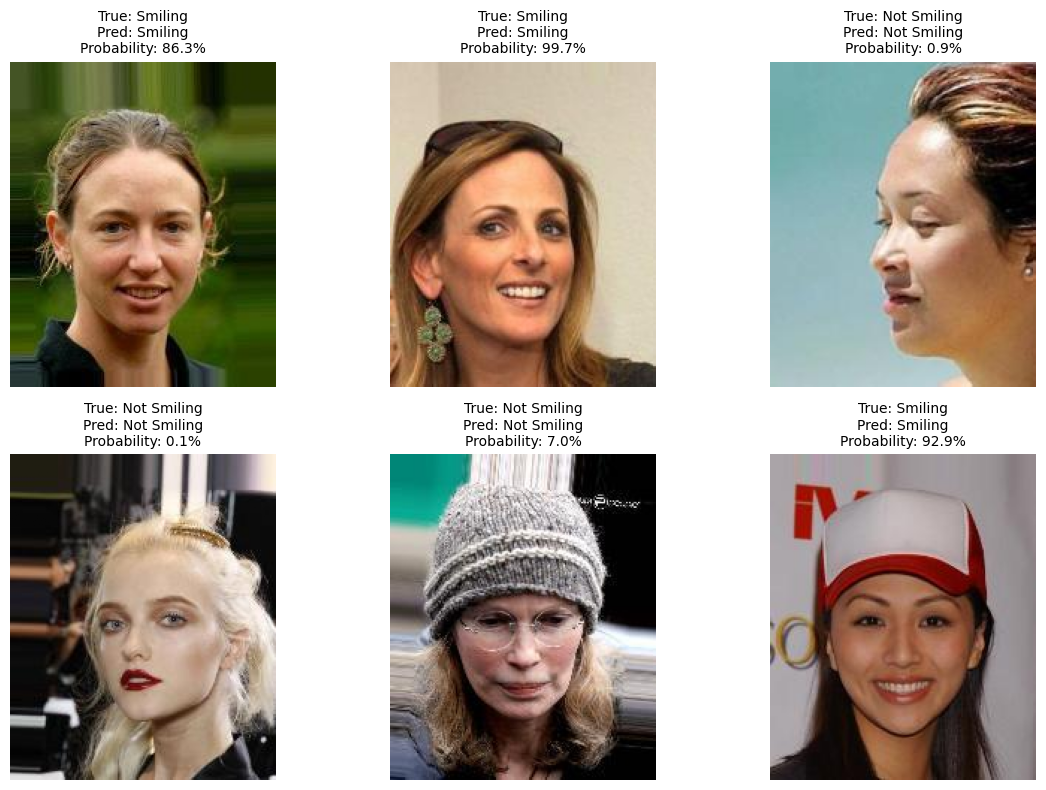

In [10]:

def predict_image(model, image, device):
    model.eval()
    image = image.to(device).unsqueeze(0)
    logits = model(image)
    probs = torch.sigmoid(logits)
    p = probs.item() * 100
    return probs.item() > 0.5, p



def visualize_predictions(model, dataloader, device, batch_idx=0, num_images=6):
    model.eval()
    plt.figure(figsize=(12, 8))

    # grab specific batch
    for idx, (X_batch, y_batch) in enumerate(dataloader):
        if idx == batch_idx:
            break
    else:
        print(f"Batch index {batch_idx} out of range.")
        return

    num_images = min(num_images, X_batch.size(0))

    for i in range(num_images):
        image = X_batch[i]
        label = y_batch[i].item()
        pred, perc = predict_image(model, image, device)
        plt.subplot(2, 3, i + 1)
        plt.imshow(np.transpose(image.cpu().numpy(), (1, 2, 0)))
        plt.title(
            f"True: {'Smiling' if label else 'Not Smiling'}\n"
            f"Pred: {'Smiling' if pred else 'Not Smiling'}\n"
            f"Probability: {perc:.1f}%",
            fontsize=10,
        )
        plt.axis("off")

    plt.tight_layout()
    plt.show()
with torch.no_grad():   
    visualize_predictions(model, test_dataloader, device, batch_idx=9, num_images=6)